In [ ]:
%pip install sqlalchemy==1.4.7

# Python & SQL

## Conectando de Maneira "Crua"

In [1]:
import sqlite3
con = sqlite3.connect('chinook.db')

In [2]:
cur = con.cursor()

result = cur.execute("SELECT * FROM Track LIMIT 10")

for row in result:
    print(row)

(1, 'For Those About To Rock (We Salute You)', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 343719, 11170334, 0.99)
(2, 'Balls to the Wall', 2, 2, 1, None, 342562, 5510424, 0.99)
(3, 'Fast As a Shark', 3, 2, 1, 'F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman', 230619, 3990994, 0.99)
(4, 'Restless and Wild', 3, 2, 1, 'F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman', 252051, 4331779, 0.99)
(5, 'Princess of the Dawn', 3, 2, 1, 'Deaffy & R.A. Smith-Diesel', 375418, 6290521, 0.99)
(6, 'Put The Finger On You', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 205662, 6713451, 0.99)
(7, "Let's Get It Up", 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 233926, 7636561, 0.99)
(8, 'Inject The Venom', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 210834, 6852860, 0.99)
(9, 'Snowballed', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 203102, 6599424, 0.99)
(10, 'Evil Walks', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 263497

O que _é_ uma row?

In [3]:
type(row)

tuple

In [4]:
row

(10,
 'Evil Walks',
 1,
 1,
 1,
 'Angus Young, Malcolm Young, Brian Johnson',
 263497,
 8611245,
 0.99)

Uma tupla! Ou seja, ela possui só um comportamento básico de guardar um conjunto de informações

In [5]:
result = cur.execute("""
SELECT
    t.name, t.composer, g.name
FROM
    Track AS t
INNER JOIN
    Genre AS g
        ON t.genreid = g.genreid
LIMIT 10;""")

for row in result:
    print(row)


('For Those About To Rock (We Salute You)', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
('Balls to the Wall', None, 'Rock')
('Fast As a Shark', 'F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman', 'Rock')
('Restless and Wild', 'F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman', 'Rock')
('Princess of the Dawn', 'Deaffy & R.A. Smith-Diesel', 'Rock')
('Put The Finger On You', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
("Let's Get It Up", 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
('Inject The Venom', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
('Snowballed', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
('Evil Walks', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')


In [6]:
result = cur.execute("SELECT COUNT(*) FROM Track;")

for row in result:
    print(row)

row[0]

(3504,)


3504

Em algumas situações, o uso de conexões diretas assim pode ser útil. Porém, ele possui algumas desvantagens - muita coisa a gente acaba tendo que fazer "na mão". Além disso, se a gente quiser ler um certo valor dado pelo usuário e utilizar isso para construir nossa query, nós precisamos ter muito cuidado em _validar_ os dados que o usuário envia, para não sofrermos com [SQL Injection](https://www.w3schools.com/sql/sql_injection.asp)

## Usando o SQL Alchemy Core

O SQL Alchemy tem dois modos de operação Core e ORM. O "Core" é um 'embrulho' fino sobre as funções do SQL puro - ou seja, nosso código vai ser feito em _python_, mas utilizando termos e construções como as que vimos em SQL. [Tutorial Oficial do SQL Alchemy Core](https://docs.sqlalchemy.org/en/14/core/tutorial.html)

In [7]:
from sqlalchemy import create_engine, MetaData, Table, insert

In [8]:
database = "sqlite:///chinook.db"
meta = MetaData()
engine = create_engine(database)
conn = engine.connect()


customer = Table('Customer', meta, autoload_with=engine) # Carrega 'customer' automaticamente
track = Table('Track', meta, autoload_with=engine)
invoice = Table('Invoice', meta, autoload_with=engine)
artist = Table('Artist', meta, autoload_with=engine)

In [9]:
artist

Table('Artist', MetaData(), Column('ArtistId', INTEGER(), table=<Artist>, primary_key=True, nullable=False), Column('Name', NVARCHAR(length=120), table=<Artist>), schema=None)

In [10]:
instruction = insert(artist).values(Name="teste pelo SQLA Core 1")

In [11]:
print(instruction)

INSERT INTO "Artist" ("Name") VALUES (:Name)


In [12]:
res = conn.execute(instruction)

(Mais informações sobre carregar tabelas já existentes [aqui](https://docs.sqlalchemy.org/en/14/core/reflection.html))

### Um Select Básico

In [13]:
type(customer)

sqlalchemy.sql.schema.Table

In [14]:
select = customer.select().limit(10)

In [15]:
print(select)

SELECT "Customer"."CustomerId", "Customer"."FirstName", "Customer"."LastName", "Customer"."Company", "Customer"."Address", "Customer"."City", "Customer"."State", "Customer"."Country", "Customer"."PostalCode", "Customer"."Phone", "Customer"."Fax", "Customer"."Email", "Customer"."SupportRepId" 
FROM "Customer"
 LIMIT :param_1


Note que aqui utilizamos uma função chamada `select()`. Essa é uma função **do Python** que 'embrulha' uma chamada para `SELECT` no SQL. Essa linha toda é igual à `SELECT * FROM Customer LIMIT 10`, porém utilizando funções do Python, e não do SQL

In [16]:
result = conn.execute(select)

In [17]:
for row in result:
    print(row)

(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3)
(2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5)
(3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3)
(4, 'Bjørn', 'Hansen', None, 'Ullevålsveien 14', 'Oslo', None, 'Norway', '0171', '+47 22 44 22 22', None, 'bjorn.hansen@yahoo.no', 4)
(5, 'František', 'Wichterlová', 'JetBrains s.r.o.', 'Klanova 9/506', 'Prague', None, 'Czech Republic', '14700', '+420 2 4172 5555', '+420 2 4172 5555', 'frantisekw@jetbrains.com', 4)
(6, 'Helena', 'Holý', None, 'Rilská 3174/6', 'Prague', None, 'Czech Republic', '14300', '+420 2 4177 0449', None, 'hholy@gmail.com', 5)
(7, 'Astrid', '

O que _é_ essa row?

In [18]:
type(row)

sqlalchemy.engine.row.LegacyRow

A `row` retornada pelo SQL Alchemy aqui é um objeto mais rico que uma tupla! [documentação](https://docs.sqlalchemy.org/en/14/core/connections.html?highlight=sqlalchemy%20engine%20row%20legacyrow#sqlalchemy.engine.LegacyRow)

Nós podemos fazer mais coisas, como por exemplo listar os campos:

In [19]:
import sqlalchemy
sqlalchemy.__version__

'1.4.7'

In [20]:
dir(row)

['__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_abc_impl',
 '_asdict',
 '_data',
 '_default_key_style',
 '_field_defaults',
 '_fields',
 '_filter_on_values',
 '_get_by_key_impl',
 '_get_by_key_impl_mapping',
 '_key_style',
 '_keymap',
 '_mapping',
 '_op',
 '_parent',
 '_replace',
 '_special_name_accessor',
 '_values_impl',
 'count',
 'has_key',
 'index',
 'items',
 'iterkeys',
 'itervalues',
 'keys',
 'values']

In [22]:
row._fields

('CustomerId',
 'FirstName',
 'LastName',
 'Company',
 'Address',
 'City',
 'State',
 'Country',
 'PostalCode',
 'Phone',
 'Fax',
 'Email',
 'SupportRepId')

Podemos também listar os dados com os campos anexos:

In [23]:
row._mapping

{'CustomerId': 10, 'FirstName': 'Eduardo', 'LastName': 'Martins', 'Company': 'Woodstock Discos', 'Address': 'Rua Dr. Falcão Filho, 155', 'City': 'São Paulo', 'State': 'SP', 'Country': 'Brazil', 'PostalCode': '01007-010', 'Phone': '+55 (11) 3033-5446', 'Fax': '+55 (11) 3033-4564', 'Email': 'eduardo@woodstock.com.br', 'SupportRepId': 4}

In [24]:
result = conn.execute(select)

In [25]:
for row in result:
    print(f"Nome: {row._mapping['FirstName']}")

Nome: Luís
Nome: Leonie
Nome: François
Nome: Bjørn
Nome: František
Nome: Helena
Nome: Astrid
Nome: Daan
Nome: Kara
Nome: Eduardo


**ALERTA**: o `result` é um "cursor" isso significa que quando você itera sobre ele todo uma vez, ele esvazia. Rodar aquele mesmo código de novo, sem computar o resultado mais uma vez, não faz nada:

In [26]:
for row in result:
    print(f"Nome: {row._mapping['FirstName']}")

Uma possibilidade quanto a isso é salvar o resultado em uma lista:

In [27]:
result = list(conn.execute(select))
for row in result:
    print(f"Nome: {row._mapping['FirstName']}")
    
print("**** imprimindo de novo! ****")

for row in result:
    print(f"Nome: {row._mapping['FirstName']}")

Nome: Luís
Nome: Leonie
Nome: François
Nome: Bjørn
Nome: František
Nome: Helena
Nome: Astrid
Nome: Daan
Nome: Kara
Nome: Eduardo
**** imprimindo de novo! ****
Nome: Luís
Nome: Leonie
Nome: François
Nome: Bjørn
Nome: František
Nome: Helena
Nome: Astrid
Nome: Daan
Nome: Kara
Nome: Eduardo


Note que isso tem um _custo_. Quando você tem um cursor 'puro', Python vai guardar na memória poucas informações. Quando você converte numa lista, você grava em memória **tudo**. Com um cursor, você consegue fazer uma iteração por uma quantidade arbitrária de dados, com uma lista não.

### Selecionando Agregações

Dentro de [`sqlalchemy.sql.functions`](https://docs.sqlalchemy.org/en/14/core/functions.html?highlight=max#sql-and-generic-functions) existe a implementação de várias funções do SQL, inclusive as de agregação

In [28]:
from sqlalchemy import select, func
count = select(
    func.count()
).select_from(track)

In [29]:
print(count)  # podemos ver o SQL gerado

SELECT count(*) AS count_1 
FROM "Track"


In [30]:
conn.execute(count).scalar()

3504

In [31]:
stats = select(
    func.count(),
    func.avg(track.columns["Milliseconds"]),
    func.min(track.columns["Milliseconds"]),
    func.max(track.columns["Milliseconds"]),
    func.sum(track.columns["Milliseconds"])
)

In [32]:
print(stats)

SELECT count(*) AS count_1, avg("Track"."Milliseconds") AS avg_1, min("Track"."Milliseconds") AS min_1, max("Track"."Milliseconds") AS max_1, sum("Track"."Milliseconds") AS sum_1 
FROM "Track"


In [33]:
res = conn.execute(stats)
res.first()._mapping

{'count_1': 3504, 'avg_1': 396340.7645547945, 'min_1': 1071, 'max_1': 9999999, 'sum_1': 1388778039}

### Buscas com WHERE

In [34]:
from sqlalchemy import and_

In [35]:
milliseconds = track.columns["Milliseconds"]
query = select(track).where(milliseconds > 60*1000*10)

In [36]:
print(query)

SELECT "Track"."TrackId", "Track"."Name", "Track"."AlbumId", "Track"."MediaTypeId", "Track"."GenreId", "Track"."Composer", "Track"."Milliseconds", "Track"."Bytes", "Track"."UnitPrice" 
FROM "Track" 
WHERE "Track"."Milliseconds" > :Milliseconds_1


In [37]:
res = conn.execute(query)
res.first()._mapping

/home/fbidu/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sqlalchemy/sql/sqltypes.py:727: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  util.warn(


{'TrackId': 154, 'Name': 'Sleeping Village', 'AlbumId': 16, 'MediaTypeId': 1, 'GenreId': 3, 'Composer': None, 'Milliseconds': 644571, 'Bytes': 21128525, 'UnitPrice': Decimal('0.99')}

In [38]:
query = select(func.count()).where(milliseconds > 60*1000*10).select_from(track)

In [39]:
print(query)

SELECT count(*) AS count_1 
FROM "Track" 
WHERE "Track"."Milliseconds" > :Milliseconds_1


In [40]:
res = conn.execute(query)
res.scalar()

261

In [41]:
query = select(
    func.count()
).where(
    and_(
        milliseconds > 60*1000*10,
        milliseconds < 60*1000*11
    )
).select_from(track)

In [42]:
print(query)

SELECT count(*) AS count_1 
FROM "Track" 
WHERE "Track"."Milliseconds" > :Milliseconds_1 AND "Track"."Milliseconds" < :Milliseconds_2


In [43]:
res = conn.execute(query)
res.scalar()

15

## SQLAlchemy ORM

In [44]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import sessionmaker

In [45]:
Session = sessionmaker(bind=engine)
session = Session()
Base = automap_base()
Base.prepare(engine, reflect=True)


In [46]:
Track = Base.classes.Track
Genre = Base.classes.Genre

In [47]:
Track.__table__

Table('Track', MetaData(), Column('TrackId', INTEGER(), table=<Track>, primary_key=True, nullable=False), Column('Name', NVARCHAR(length=200), table=<Track>, nullable=False), Column('AlbumId', INTEGER(), ForeignKey('Album.AlbumId'), table=<Track>), Column('MediaTypeId', INTEGER(), ForeignKey('MediaType.MediaTypeId'), table=<Track>, nullable=False), Column('GenreId', INTEGER(), ForeignKey('Genre.GenreId'), table=<Track>), Column('Composer', NVARCHAR(length=220), table=<Track>), Column('Milliseconds', INTEGER(), table=<Track>, nullable=False), Column('Bytes', INTEGER(), table=<Track>), Column('UnitPrice', NUMERIC(precision=10, scale=2), table=<Track>, nullable=False), schema=None)

In [48]:
for item in session.query(Track).limit(10):
    print(item.Name)

For Those About To Rock (We Salute You)
Balls to the Wall
Fast As a Shark
Restless and Wild
Princess of the Dawn
Put The Finger On You
Let's Get It Up
Inject The Venom
Snowballed
Evil Walks


In [49]:
type(item)

sqlalchemy.ext.automap.Track

In [50]:
item.Name

'Evil Walks'

In [51]:
item.Milliseconds

263497

In [52]:
new_item = Track()


In [53]:
new_item.Name = "test"

In [54]:
result = cur.execute("""
SELECT
    t.name, t.composer, g.name
FROM
    Track AS t
INNER JOIN
    Genre AS g
        ON t.genreid = g.genreid
LIMIT 10;""")

for row in result:
    print(row)


('For Those About To Rock (We Salute You)', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
('Balls to the Wall', None, 'Rock')
('Fast As a Shark', 'F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman', 'Rock')
('Restless and Wild', 'F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman', 'Rock')
('Princess of the Dawn', 'Deaffy & R.A. Smith-Diesel', 'Rock')
('Put The Finger On You', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
("Let's Get It Up", 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
('Inject The Venom', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
('Snowballed', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')
('Evil Walks', 'Angus Young, Malcolm Young, Brian Johnson', 'Rock')


In [55]:
dir(item)

['AlbumId',
 'Bytes',
 'Composer',
 'GenreId',
 'MediaTypeId',
 'Milliseconds',
 'Name',
 'TrackId',
 'UnitPrice',
 '__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_instance_state',
 '_sa_raise_deferred_config',
 '_sa_registry',
 'album',
 'classes',
 'genre',
 'invoiceline_collection',
 'mediatype',
 'metadata',
 'playlist_collection',
 'prepare',
 'registry']

In [56]:
item.Name

'Evil Walks'

In [57]:
item.TrackId

10

In [58]:
item.Milliseconds

263497

## Performance

Vamos considerar a tarefa de somar o tempo - em milisegundos - de todas as faixas no nosso banco de dados. O nosso objetivo com esse experimento é comparar se é mais rápido fazer isso através de uma instrução SQL ou por meio de iterar por todos os resultados, somando cada um.

In [143]:
%pip install tqdm plotly pandas

     |████████████████████████████████| 11.7 MB 8.2 MB/s            
     |████████████████████████████████| 16.8 MB 136.0 MB/s            
You should consider upgrading via the '/home/fbidu/.pyenv/versions/3.8.12/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [100]:
from tqdm import tqdm
from random import randint
database = "sqlite:///chinook_big.db"
meta = MetaData()
engine = create_engine(database)
conn = engine.connect()


In [102]:
def insert_random_tracks(count=1_000_000):
    buffer_size = 1000
    with conn.begin() as t:
        for i in tqdm(range(count)):
            stmt = insert(track).values(
                Name=f'rando {i}',
                MediaTypeId=1,
                Milliseconds=randint(100_000, 900_000),
                UnitPrice=10
            )
            conn.execute(stmt)
            
            

In [103]:
insert_random_tracks()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [01:45<00:00, 9478.31it/s]


In [104]:
def sum_manual():
    query = select(track)
    result = engine.execute(query)

    sum_ = 0
    for row in result:
        sum_ += row.Milliseconds
    return sum_

In [105]:
from sqlalchemy.sql import func

def sum_sql():
    query = select(func.sum(track.columns["Milliseconds"]))
    result = engine.execute(query)
    return result.scalar()



In [106]:
%timeit sum_manual()

/home/fbidu/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sqlalchemy/sql/sqltypes.py:727: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  util.warn(


2.07 s ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [107]:
%timeit sum_sql()

39.1 ms ± 418 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [114]:
def sum_sql(limit=10):
    select_limit = select(track.columns["Milliseconds"]).limit(limit)
    select_count = select(func.sum(select_limit.columns["Milliseconds"]))
    count = conn.execute(select_count)
    return count.scalar()

def sum_manual(limit=10):
    query = select(track).limit(limit)
    result = engine.execute(query)

    sum_ = 0
    for row in result:
        sum_ += row.Milliseconds
    return sum_

In [140]:
sql_times = []
manual_times = []

for i in tqdm(range(0, 1_000_001, 10_000)):
    benchmark_sql = %timeit -n1 -r1 -o sum_sql(limit=i)
    benchmark_manual = %timeit -n1 -r1 -o sum_manual(limit=i)
    sql_times.append(benchmark_sql.average)
    manual_times.append(benchmark_manual.average)



  0%|                                                                                                                                                        | 0/101 [00:00<?, ?it/s]

  4%|█████▋                                                                                                                                          | 4/101 [00:00<00:03, 28.16it/s]

849 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.14 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
891 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
23.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
44.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.88 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
62.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




  6%|████████▌                                                                                                                                       | 6/101 [00:00<00:05, 18.40it/s]

84.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.97 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
105 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.17 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




  7%|█████████▉                                                                                                                                      | 7/101 [00:00<00:07, 12.96it/s]

  8%|███████████▍                                                                                                                                    | 8/101 [00:00<00:09, 10.07it/s]

125 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.08 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
145 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




  9%|████████████▊                                                                                                                                   | 9/101 [00:00<00:11,  8.15it/s]

 10%|██████████████▏                                                                                                                                | 10/101 [00:00<00:13,  6.95it/s]

171 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.81 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
186 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 11%|███████████████▌                                                                                                                               | 11/101 [00:01<00:14,  6.05it/s]

208 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.01 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 12%|████████████████▉                                                                                                                              | 12/101 [00:01<00:16,  5.37it/s]

228 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.67 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 13%|██████████████████▍                                                                                                                            | 13/101 [00:01<00:18,  4.82it/s]

248 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.94 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 14%|███████████████████▊                                                                                                                           | 14/101 [00:01<00:19,  4.37it/s]

269 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 15%|█████████████████████▏                                                                                                                         | 15/101 [00:02<00:21,  4.00it/s]

289 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.05 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 16%|██████████████████████▋                                                                                                                        | 16/101 [00:02<00:23,  3.69it/s]

310 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.58 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 17%|████████████████████████                                                                                                                       | 17/101 [00:02<00:24,  3.43it/s]

329 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
9.02 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 18%|█████████████████████████▍                                                                                                                     | 18/101 [00:03<00:25,  3.20it/s]

351 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
9.65 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 19%|██████████████████████████▉                                                                                                                    | 19/101 [00:03<00:27,  2.98it/s]

377 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
9.69 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 20%|████████████████████████████▎                                                                                                                  | 20/101 [00:04<00:28,  2.81it/s]

392 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 21%|█████████████████████████████▋                                                                                                                 | 21/101 [00:04<00:30,  2.65it/s]

414 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 22%|███████████████████████████████▏                                                                                                               | 22/101 [00:04<00:31,  2.51it/s]

437 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 23%|████████████████████████████████▌                                                                                                              | 23/101 [00:05<00:32,  2.39it/s]

453 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 24%|█████████████████████████████████▉                                                                                                             | 24/101 [00:05<00:33,  2.28it/s]

473 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 25%|███████████████████████████████████▍                                                                                                           | 25/101 [00:06<00:34,  2.18it/s]

492 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
12.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 26%|████████████████████████████████████▊                                                                                                          | 26/101 [00:06<00:35,  2.08it/s]

513 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
13.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 27%|██████████████████████████████████████▏                                                                                                        | 27/101 [00:07<00:37,  2.00it/s]

535 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
13.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 28%|███████████████████████████████████████▋                                                                                                       | 28/101 [00:08<00:38,  1.92it/s]

555 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
13.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 29%|█████████████████████████████████████████                                                                                                      | 29/101 [00:08<00:39,  1.84it/s]

575 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
14.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 30%|██████████████████████████████████████████▍                                                                                                    | 30/101 [00:09<00:40,  1.77it/s]

601 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
14.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 31%|███████████████████████████████████████████▉                                                                                                   | 31/101 [00:09<00:41,  1.71it/s]

618 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
15.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 32%|█████████████████████████████████████████████▎                                                                                                 | 32/101 [00:10<00:41,  1.65it/s]

639 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 33%|██████████████████████████████████████████████▋                                                                                                | 33/101 [00:11<00:42,  1.59it/s]

659 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 34%|████████████████████████████████████████████████▏                                                                                              | 34/101 [00:11<00:43,  1.54it/s]

676 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 35%|█████████████████████████████████████████████████▌                                                                                             | 35/101 [00:12<00:44,  1.49it/s]

698 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
17.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 36%|██████████████████████████████████████████████████▉                                                                                            | 36/101 [00:13<00:44,  1.45it/s]

718 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
17.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 37%|████████████████████████████████████████████████████▍                                                                                          | 37/101 [00:14<00:45,  1.41it/s]

742 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
18.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 38%|█████████████████████████████████████████████████████▊                                                                                         | 38/101 [00:14<00:46,  1.37it/s]

762 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
19.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 39%|███████████████████████████████████████████████████████▏                                                                                       | 39/101 [00:15<00:46,  1.32it/s]

786 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
19.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 40%|████████████████████████████████████████████████████████▋                                                                                      | 40/101 [00:16<00:47,  1.29it/s]

803 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
19.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 41%|██████████████████████████████████████████████████████████                                                                                     | 41/101 [00:17<00:47,  1.25it/s]

826 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
20.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 42%|███████████████████████████████████████████████████████████▍                                                                                   | 42/101 [00:18<00:48,  1.22it/s]

847 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
20.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 43%|████████████████████████████████████████████████████████████▉                                                                                  | 43/101 [00:19<00:48,  1.19it/s]

868 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
21 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 44%|██████████████████████████████████████████████████████████████▎                                                                                | 44/101 [00:20<00:49,  1.16it/s]

888 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
21.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 45%|███████████████████████████████████████████████████████████████▋                                                                               | 45/101 [00:21<00:49,  1.13it/s]

909 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
22 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 46%|█████████████████████████████████████████████████████████████████▏                                                                             | 46/101 [00:21<00:49,  1.11it/s]

922 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
22.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 47%|██████████████████████████████████████████████████████████████████▌                                                                            | 47/101 [00:22<00:49,  1.08it/s]

949 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
23.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 48%|███████████████████████████████████████████████████████████████████▉                                                                           | 48/101 [00:23<00:50,  1.06it/s]

966 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
23.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 49%|█████████████████████████████████████████████████████████████████████▍                                                                         | 49/101 [00:24<00:50,  1.03it/s]

997 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
23.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 50%|██████████████████████████████████████████████████████████████████████▊                                                                        | 50/101 [00:25<00:50,  1.01it/s]

1.01 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
24 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 50%|████████████████████████████████████████████████████████████████████████▏                                                                      | 51/101 [00:27<00:50,  1.01s/it]

1.05 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
25.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 51%|█████████████████████████████████████████████████████████████████████████▌                                                                     | 52/101 [00:28<00:50,  1.03s/it]

1.05 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
26 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 52%|███████████████████████████████████████████████████████████████████████████                                                                    | 53/101 [00:29<00:50,  1.05s/it]

1.07 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
25.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 53%|████████████████████████████████████████████████████████████████████████████▍                                                                  | 54/101 [00:30<00:50,  1.07s/it]

1.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
26.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 54%|█████████████████████████████████████████████████████████████████████████████▊                                                                 | 55/101 [00:31<00:50,  1.09s/it]

1.11 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
26.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 55%|███████████████████████████████████████████████████████████████████████████████▎                                                               | 56/101 [00:32<00:50,  1.11s/it]

1.13 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
27.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 56%|████████████████████████████████████████████████████████████████████████████████▋                                                              | 57/101 [00:33<00:49,  1.13s/it]

1.15 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
28.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 57%|██████████████████████████████████████████████████████████████████████████████████                                                             | 58/101 [00:35<00:49,  1.15s/it]

1.17 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
28.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 58%|███████████████████████████████████████████████████████████████████████████████████▌                                                           | 59/101 [00:36<00:49,  1.18s/it]

1.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
29 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 59%|████████████████████████████████████████████████████████████████████████████████████▉                                                          | 60/101 [00:37<00:49,  1.20s/it]

1.22 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
28.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 60%|██████████████████████████████████████████████████████████████████████████████████████▎                                                        | 61/101 [00:38<00:48,  1.22s/it]

1.23 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
29.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 61%|███████████████████████████████████████████████████████████████████████████████████████▊                                                       | 62/101 [00:40<00:48,  1.24s/it]

1.26 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 62%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 63/101 [00:41<00:48,  1.27s/it]

1.29 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 63%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 64/101 [00:42<00:47,  1.29s/it]

1.31 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
36.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 64%|████████████████████████████████████████████████████████████████████████████████████████████                                                   | 65/101 [00:44<00:47,  1.31s/it]

1.33 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
36.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 65%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 66/101 [00:45<00:46,  1.33s/it]

1.34 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 66%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 67/101 [00:46<00:46,  1.36s/it]

1.39 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
32.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 67%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 68/101 [00:48<00:45,  1.37s/it]

1.36 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
32.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 69/101 [00:49<00:44,  1.39s/it]

1.39 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
33.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 69%|███████████████████████████████████████████████████████████████████████████████████████████████████                                            | 70/101 [00:51<00:43,  1.41s/it]

1.42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
33.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 70%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 71/101 [00:52<00:42,  1.43s/it]

1.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
41.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 72/101 [00:54<00:42,  1.45s/it]

1.46 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
35.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 73/101 [00:55<00:41,  1.47s/it]

1.49 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 74/101 [00:57<00:40,  1.49s/it]

1.49 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
35.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 75/101 [00:58<00:39,  1.51s/it]

1.51 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
35.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 76/101 [01:00<00:38,  1.53s/it]

1.54 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
36.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 77/101 [01:01<00:37,  1.56s/it]

1.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
38.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 78/101 [01:03<00:36,  1.58s/it]

1.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
43.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 79/101 [01:05<00:35,  1.61s/it]

1.63 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
38.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 80/101 [01:06<00:34,  1.63s/it]

1.64 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
39.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 81/101 [01:08<00:33,  1.66s/it]

1.69 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 82/101 [01:10<00:32,  1.68s/it]

1.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
39.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 83/101 [01:12<00:30,  1.70s/it]

1.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 84/101 [01:13<00:29,  1.72s/it]

1.73 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
41 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 85/101 [01:15<00:27,  1.74s/it]

1.74 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
41.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 86/101 [01:17<00:26,  1.76s/it]

1.75 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
42.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 87/101 [01:19<00:24,  1.77s/it]

1.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
43.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 88/101 [01:21<00:23,  1.79s/it]

1.79 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
41.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 89/101 [01:23<00:21,  1.81s/it]

1.81 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
42.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 90/101 [01:24<00:20,  1.83s/it]

1.83 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
42.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 91/101 [01:26<00:18,  1.85s/it]

1.85 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
43.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 92/101 [01:28<00:16,  1.86s/it]

1.86 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
45.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 93/101 [01:30<00:15,  1.88s/it]

1.87 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
44 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 94/101 [01:32<00:13,  1.90s/it]

1.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
45 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 95/101 [01:34<00:11,  1.92s/it]

1.92 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
47.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 96/101 [01:36<00:09,  1.95s/it]

1.95 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
46.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 97/101 [01:38<00:07,  1.97s/it]

1.98 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
48.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 98/101 [01:40<00:05,  1.99s/it]

2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
46.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 99/101 [01:42<00:04,  2.01s/it]

2.01 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
47.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 100/101 [01:44<00:02,  2.03s/it]

2.03 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
48.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [01:46<00:00,  2.07s/it]

2.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [27]:
import plotly.express as px
import pandas

x = np.linspace(0, 1_000_000, len(manual_times))
df = pandas.DataFrame({"count": x, "manual": manual_times, "sql": sql_times})

fig = px.line(df, x="count", y=["manual", "sql"], labels={"value": "Tempo (s)", "count": "Registros"})

fig.show()

In [29]:
fig = px.line(df, x="count", y="sql", labels={"sql": "Tempo (s)", "count": "Registros"})

fig.show()

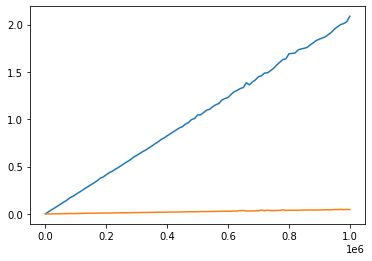

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1_000_000, len(manual_times))
plt.plot(x, manual_times)
plt.plot(x, sql_times)
plt.show()


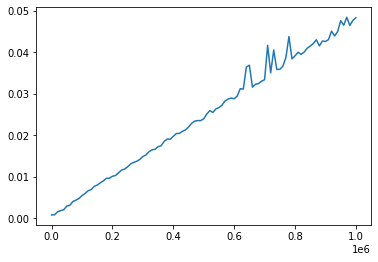

In [4]:
x = np.linspace(0, 1_000_000, len(manual_times))
plt.plot(x, sql_times)
plt.show()

In [158]:
manual_times

[0.0011446740245446563,
 0.023261455004103482,
 0.04417526989709586,
 0.06293883197940886,
 0.08411101391538978,
 0.10454227798618376,
 0.12544564704876393,
 0.1448378839995712,
 0.17071178008336574,
 0.18636171100661159,
 0.20751481596380472,
 0.227586998953484,
 0.2476126530673355,
 0.2694089930737391,
 0.2892277599312365,
 0.31002912600524724,
 0.3294056669110432,
 0.35060679994057864,
 0.3772959540365264,
 0.39157634996809065,
 0.41449855896644294,
 0.436679519014433,
 0.4529636870138347,
 0.4727491500088945,
 0.4924185280688107,
 0.5128864999860525,
 0.5345034450292587,
 0.5546927249524742,
 0.5751885790377855,
 0.601245790021494,
 0.6183334320085123,
 0.6394769999897107,
 0.6589573639212176,
 0.6761968299979344,
 0.698101763962768,
 0.7175586039666086,
 0.7417036209953949,
 0.761843721033074,
 0.7862873499980196,
 0.8028113949112594,
 0.8256828299490735,
 0.8465724220732227,
 0.8675733309937641,
 0.8880705899791792,
 0.9086752879666165,
 0.9221586609492078,
 0.949352590017952,
 0

In [159]:
sql_times

[0.0008487189188599586,
 0.0008914991049095988,
 0.0016043250216171145,
 0.0018838579999282956,
 0.0020960660185664892,
 0.0029698520665988326,
 0.0031722099520266056,
 0.004077316960319877,
 0.004401132930070162,
 0.004813393927179277,
 0.005497577018104494,
 0.006007430027239025,
 0.0066711739636957645,
 0.006943624000996351,
 0.007704580086283386,
 0.00804938399232924,
 0.008581110974773765,
 0.009020744008012116,
 0.00965033401735127,
 0.009687032084912062,
 0.01015606103464961,
 0.010340075008571148,
 0.010993318050168455,
 0.011660467949695885,
 0.011896189069375396,
 0.012434648000635207,
 0.013138465932570398,
 0.013511534896679223,
 0.01377584901638329,
 0.014223397942259908,
 0.014914993895217776,
 0.015288090915419161,
 0.01607356406748295,
 0.016519006923772395,
 0.016661725006997585,
 0.017286855028942227,
 0.017512978985905647,
 0.01856318605132401,
 0.019125337013974786,
 0.019070897018536925,
 0.019784571952186525,
 0.020466009969823062,
 0.02049965295009315,
 0.0209982

In [154]:
res.average

0.00026510430533172827